In [1]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib.')

In [3]:
print('Loading data...')
# load or create your dataset
df_train = pd.read_csv('data/regression.train', header=None, sep='\t')
df_test = pd.read_csv('data/regression.test', header=None, sep='\t')

y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)

Loading data...


In [4]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [5]:
# specify your configurations as a dict
params = {
    'num_leaves': 5,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

In [6]:
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(X_train.shape[-1])],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)

Starting training...
[10]	training's l1: 0.457448	training's l2: 0.217995	valid_1's l1: 0.456464	valid_1's l2: 0.21641
[20]	training's l1: 0.436869	training's l2: 0.205099	valid_1's l1: 0.434057	valid_1's l2: 0.201616
[30]	training's l1: 0.421302	training's l2: 0.197421	valid_1's l1: 0.417019	valid_1's l2: 0.192514
[40]	training's l1: 0.411107	training's l2: 0.192856	valid_1's l1: 0.406303	valid_1's l2: 0.187258
[50]	training's l1: 0.403695	training's l2: 0.189593	valid_1's l1: 0.398997	valid_1's l2: 0.183688
[60]	training's l1: 0.398704	training's l2: 0.187043	valid_1's l1: 0.393977	valid_1's l2: 0.181009
[70]	training's l1: 0.394876	training's l2: 0.184982	valid_1's l1: 0.389805	valid_1's l2: 0.178803
[80]	training's l1: 0.391147	training's l2: 0.1828	valid_1's l1: 0.386476	valid_1's l2: 0.176799
[90]	training's l1: 0.388101	training's l2: 0.180817	valid_1's l1: 0.384404	valid_1's l2: 0.175775
[100]	training's l1: 0.385174	training's l2: 0.179171	valid_1's l1: 0.382929	valid_1's l2: 

C:\Users\gill\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [21]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\gill\Anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Plotting metrics recorded during training...


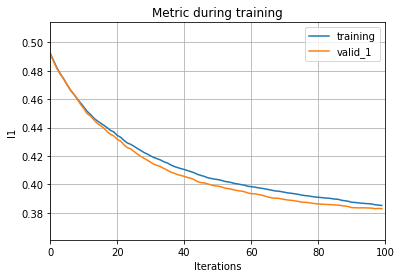

In [7]:
print('Plotting metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
plt.show()

Plotting feature importances...


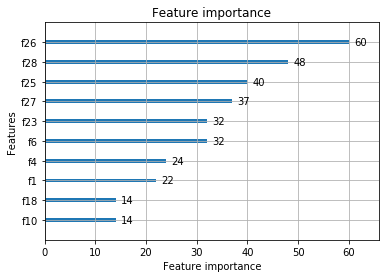

In [8]:
print('Plotting feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

In [9]:
print('Plotting split value histogram...')
ax = lgb.plot_split_value_histogram(gbm, feature='f26', bins='auto')
plt.show()

Plotting split value histogram...


AttributeError: module 'lightgbm' has no attribute 'plot_split_value_histogram'

In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'
#Download Graphviz from http://www.graphviz.org/download/
#Add below to PATH environment variable (mention the installed graphviz version):
#C:\Program Files (x86)\Graphviz2.38\bin
#C:\Program Files (x86)\Graphviz2.38\bin\dot.exe

Download Graphviz from http://www.graphviz.org/download/
Add below to PATH environment variable (mention the installed graphviz version):
C:\Program Files (x86)\Graphviz2.38\bin
C:\Program Files (x86)\Graphviz2.38\bin\dot.exe
Close any opened Juypter notebook and the command prompt
Restart Jupyter / cmd prompt and test

Plotting 54th tree...


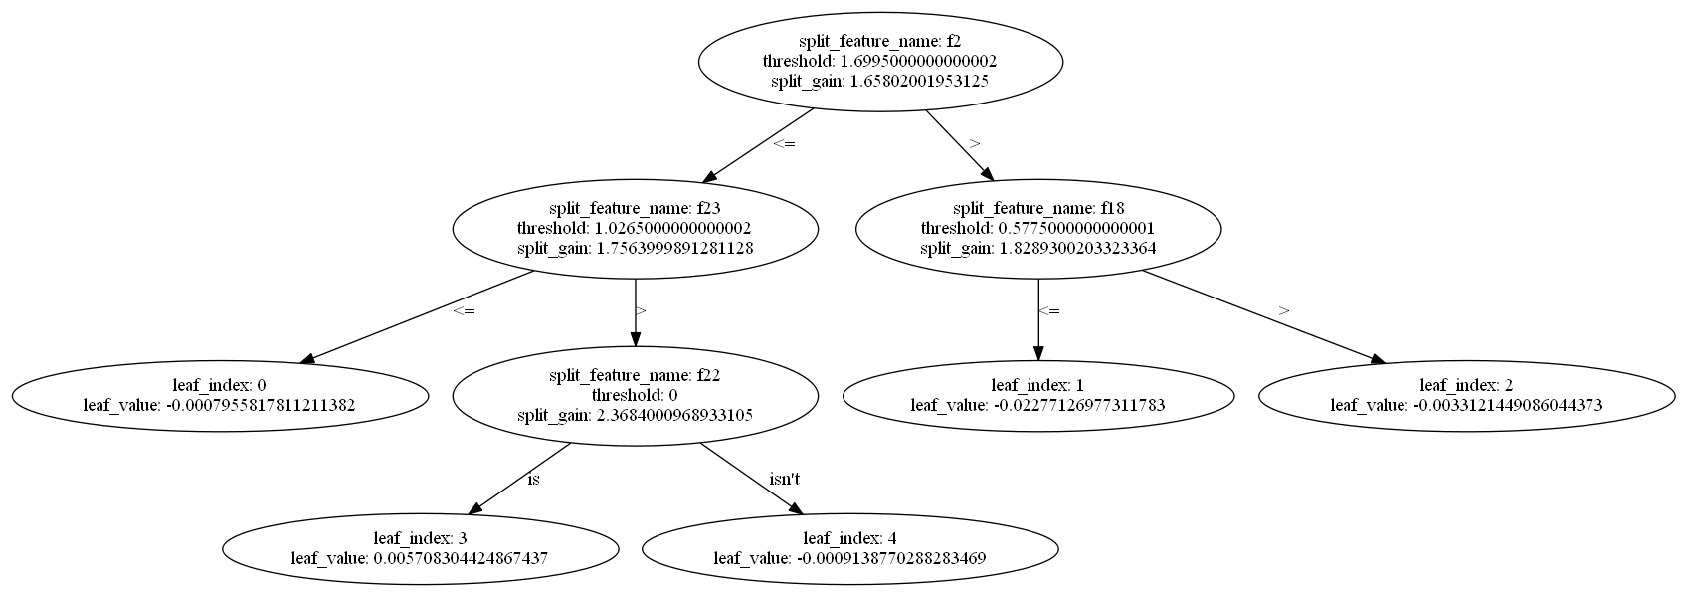

In [11]:
print('Plotting 54th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(gbm, tree_index=53, figsize=(30, 30), show_info=['split_gain'])
plt.show()

In [12]:
print('Plotting 54th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=53, name='Tree54')
graph.render(view=True)

Plotting 54th tree with graphviz...


'Tree54.gv.pdf'